In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
digits = datasets.load_digits()

In [3]:
target = digits.target
flatten_digits = digits.images.reshape((len(digits.images),-1))

Visualize Some Handwritten Images in the Dataset

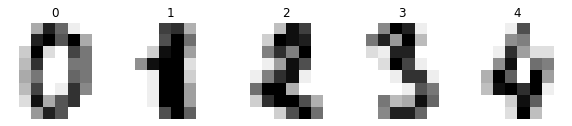

In [4]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for ax, image, label in zip(axes, digits.images, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('%i' % label)

Divide Images into Training and Test Set

In [5]:
X_train, X_test,y_train,y_test = train_test_split(flatten_digits,target,test_size=0.2)

Hand-written classification with logistic regression

In [6]:
scaler = StandardScaler()
X_train_logistic = scaler.fit_transform(X_train)
X_test_logistic = scaler.transform(X_test)

In [7]:
logit = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

In [8]:
logit.fit(X_train_logistic,y_train)

LogisticRegression(C=0.01, multi_class='multinomial', penalty='l1',
                   solver='saga', tol=0.1)

In [9]:
y_pred_logistic = logit.predict(X_test_logistic)

In [10]:
label_names = [0,1,2,3,4,5,6,7,8,9]
cmx = confusion_matrix(y_test,y_pred_logistic,labels=label_names)

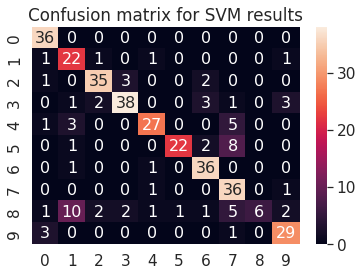

In [11]:
df_cm = pd.DataFrame(cmx)
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True, annot_kws={"size":16})
title = "Confusion matrix for SVM results"
plt.title(title)
plt.show()

Hand-written classification with SVM

In [12]:
svm_classifier = svm.SVC(gamma='scale')
svm_classifier.fit(X_train,y_train)

SVC()

In [13]:
y_pred_svm = svm_classifier.predict(X_test)

In [16]:
print("Accuracy:"+str(accuracy_score(y_test,y_pred_svm)))

Accuracy:0.9833333333333333


In [17]:
label_names=[0,1,2,3,4,5,6,7,8,9]
cmx = confusion_matrix(y_test,y_pred_svm,labels=label_names)

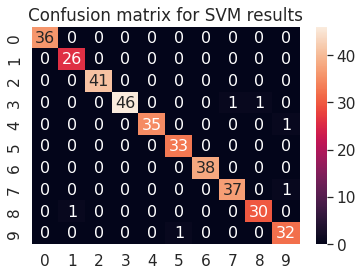

In [18]:
df_cm = pd.DataFrame(cmx)
sns.set(font_scale=1.4)
sns.heatmap(df_cm,annot=True, annot_kws={"size":16})
title = "Confusion matrix for SVM results"
plt.title(title)
plt.show()

Comparing both SVM and Logistic Regression with K-Fold Cross Validation

In [25]:
algorithm = []
algorithm.append(('SVM', svm_classifier))
algorithm.append(('Logistic_L1', logit))
algorithm.append(('Logistic_L2', LogisticRegression(C=0.01, penalty='l2', solver='saga', tol=0.1, multi_class='multinomial')))

results = []
names = []
y = digits.target
for name, algo in algorithm:
  k_fold = model_selection.KFold(n_splits=10, random_state=10,shuffle =True)
  if name == 'SVM':
    X = flatten_digits
    cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
  else:
    scaler = StandardScaler()
    X = scaler.fit_transform(flatten_digits)
    cv_results = model_selection.cross_val_score(algo, X, y, cv=k_fold, scoring='accuracy')
        
  results.append(cv_results)
  names.append(name)


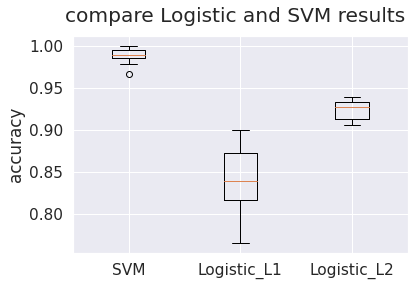

In [26]:
fig = plt.figure()
fig.suptitle('compare Logistic and SVM results')
ax= fig.add_subplot()
plt.boxplot(results)
plt.ylabel('accuracy')
ax.set_xticklabels(names)
plt.show()